In [19]:
import pandas as pd
from textblob import TextBlob
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text.strip()

# Function to classify sentiment and return polarity score
def get_sentiment_score(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Classify sentiment based on polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, polarity

# Load dataset
data = pd.read_csv('data/IMDB Dataset.csv')  # Replace with your dataset path

# Display column names to ensure the correct column is used
print("Columns in dataset:", data.columns)

# Assuming the column with text is named 'review'. Update this based on your dataset.
text_column = 'review'  # Change this to the actual name of the text column in your dataset.

if text_column not in data.columns:
    raise KeyError(f"Column '{text_column}' not found in dataset. Available columns: {data.columns}")

# Clean the text data
data['cleaned_text'] = data[text_column].apply(clean_text)

# Apply sentiment analysis and get both sentiment and polarity score
data[['sentiment', 'sentiment_score']] = data['cleaned_text'].apply(lambda x: pd.Series(get_sentiment_score(x)))

# Display results
print(data[[text_column, 'sentiment', 'sentiment_score']].head())


Columns in dataset: Index(['review', 'sentiment'], dtype='object')
                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  positive   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   sentiment_score  
0         0.023433  
1         0.111490  
2         0.346324  
3         0.001389  
4         0.217952  


In [21]:
print(data[['cleaned_text', 'sentiment']].head(10))


                                        cleaned_text sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  positive
4  petter matteis love in the time of money is a ...  positive
5  probably my alltime favorite movie a story of ...  positive
6  i sure would like to see a resurrection of a u...  positive
7  this show was an amazing fresh  innovative ide...  positive
8  encouraged by the positive comments about this...  negative
9  if you like original gut wrenching laughter yo...  positive


sentiment
positive    37836
negative    12135
neutral        29
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

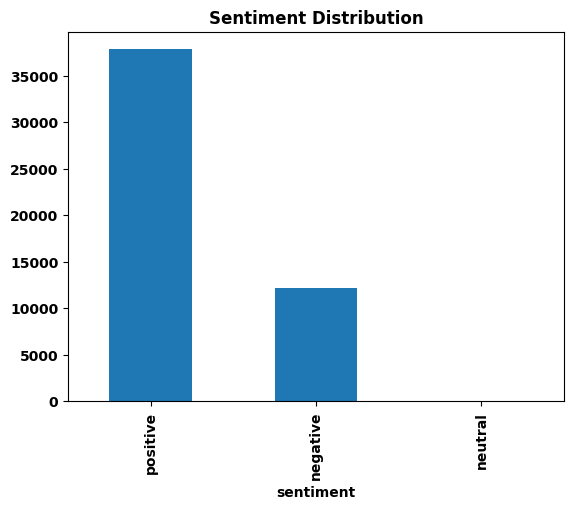

In [22]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')


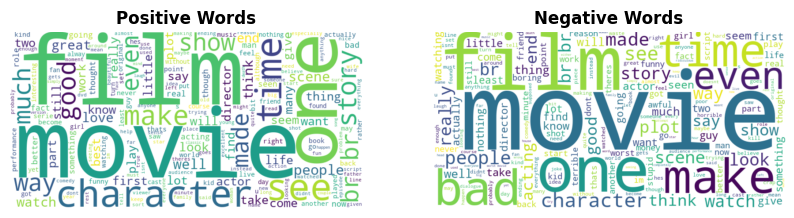

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(data[data['sentiment'] == 'positive']['cleaned_text'])
negative_text = " ".join(data[data['sentiment'] == 'negative']['cleaned_text'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Words")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Words")
plt.axis('off')

plt.show()


In [24]:
data.to_csv('processed_sentiment_data.csv', index=False)
print("Data saved to processed_sentiment_data.csv")


Data saved to processed_sentiment_data.csv
